In [1]:
# Needed for functions
import numpy as np
from scipy.special import kv as K_nu
from scipy.special import gamma as gamma_func

# Needed for notebooks
import matplotlib.pyplot as plt

# Speccy
import utils as ut
import acf
import psd
import sick_tricks as st

### First Problem
Select a parameterisation where aliasing is not an issue. There is bias present here (as seen with the bias option in <tt>bochner</tt>).

In [41]:
n = 1000
ff = ut.calc_ff(n)
noise = 0

Difference in calculated variance = 4.5312238947881056e-05


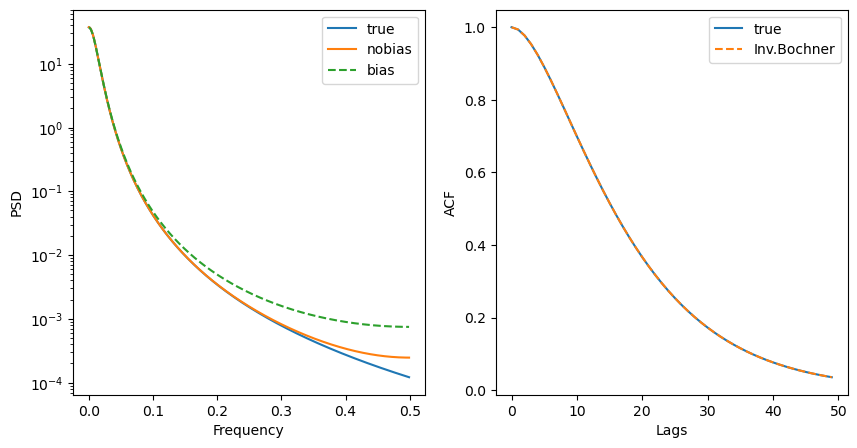

In [42]:
params = [1, 5/6 + 1, 0.1]

acf_true = acf.matern_acf(np.arange(n), params)

_, S_bias = st.bochner(acf_true, bias = True)
_, S_nobias = st.bochner(acf_true, bias = False)
S_true = psd.matern_psd(ff, params)

acf_boch = st.inv_bochner(psd.matern_psd, params, n)

# Error due to aliasing is apparent in variance
print("Difference in calculated variance = " + str(acf_true[0] - acf_boch[0]))

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(ff, S_true, label="true")
plt.plot(ff, S_nobias, label="nobias")
plt.plot(ff, S_bias, label="bias", linestyle="dashed")
plt.ylabel("PSD")
plt.xlabel("Frequency")
plt.yscale('log')

plt.legend()

plt.subplot(122)
plt.plot(acf_true[:50], label="true")
plt.plot(acf_boch[:50], label="Inv.Bochner", linestyle="dashed")
plt.ylabel("ACF")
plt.xlabel("Lags")
plt.legend();

### Second Problem
Select a parameterisation where aliasing is an issue and there is insignificant bias. Note, these two regimes exist fairly close to each other in parameter space.

Difference in calculated variance = 0.07161501219882593


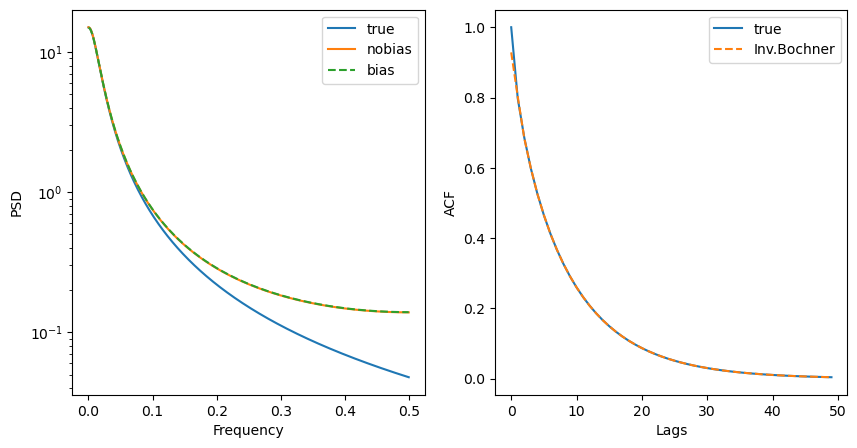

In [43]:
params = [1, 5/6, 0.1]

acf_true = acf.matern_acf(np.arange(n), params)

_, S_bias = st.bochner(acf_true, bias = True)
_, S_nobias = st.bochner(acf_true, bias = False)
S_true = psd.matern_psd(ff, params)

acf_boch = st.inv_bochner(psd.matern_psd, params, n)

# Error due to aliasing is apparent in variance
print("Difference in calculated variance = " + str(acf_true[0] - acf_boch[0]))

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(ff, S_true, label="true")
plt.plot(ff, S_nobias, label="nobias")
plt.plot(ff, S_bias, label="bias", linestyle="dashed")
plt.ylabel("PSD")
plt.xlabel("Frequency")
plt.yscale('log')

plt.legend()

plt.subplot(122)
plt.plot(acf_true[:50], label="true")
plt.plot(acf_boch[:50], label="Inv.Bochner", linestyle="dashed")
plt.ylabel("ACF")
plt.xlabel("Lags")
plt.legend();
